In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('opiate_deaths.csv')

In [3]:
df

,STATEID,FIRSTNAME,MIDDLENAME,LASTNAME,MAIDENNAME,SUFFIX,BIRTHDATE,DEATHDATE,GENDER,RACE,...,DEATHCITY,DEATHCOUNTY,MANNERDEATH,INJURY_DATE,INJURYPLACE,INJURYSTATE,INJURYCOUNTY,INJURYDESC,CAUSEA,CAUSEB
0,2005-MN-000344,RONNIE,GERALD,BLANKS,NaN,NaN,10/17/1955,1/1/2005,M,African American,...,MINNEAPOLIS,HENNEPIN,ACCIDENT,NaN,UNKNOWN,UNKNOWN,UNKNOWN,DECEASED DIED AFTER SELF-ADMINISTRATION OF ABO...,MIXED DRUG OVERDOSE (MORPHINE AND ALCOHOL),NaN
1,2005-MN-001316,MICHAEL,JOSEPH CLEMENS,JOHNSON,NaN,NaN,1/14/1964,1/9/2005,M,White,...,BLOOMINGTON,HENNEPIN,COULD NOT BE DETERMINED,NaN,UNKNOWN,UNKNOWN,UNKNOWN,DECEASED DIED AFTER SELF-ADMINISTRATION OF OP...,OPIATE OVERDOSE,NaN
2,2005-MN-001973,DONNIE,RAY,COOPER,NaN,NaN,11/10/1962,1/15/2005,M,White,...,SAINT PAUL,RAMSEY,ACCIDENT,1/15/2005,HOME,MINNESOTA,RAMSEY,INGESTED METHADONE,METHADONE TOXICITY,NaN
3,2005-MN-001377,RANDY,J.,SCHLAGEL,NaN,NaN,7/23/1957,1/18/2005,M,White,...,ROCKFORD TOWNSHIP,WRIGHT,ACCIDENT,NaN,HOME,MINNESOTA,WRIGHT,DEC INGESTED AN UNKNOWN AMOUNT OF METHADONE,METHADONE TOXICITY,NaN
4,2005-MN-007563,TERRY,JOHN,LUND,NaN,NaN,8/21/1951,1/20/2005,M,White,...,MINNEAPOLIS,HENNEPIN,ACCIDENT,1/20/2005,UNSPECIFIED PLACE,UNKNOWN,UNKNOWN,DECEASED DIED AFTER INGESTING AN OVERDOSAGE OF...,MORPHINE OVERDOSE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3802,2017-MN-044471,AMBER,LOVETTE,MOTL,NaN,NaN,2/14/1981,12/29/2017,F,White,...,LINO LAKES,ANOKA,ACCIDENT,NaN,UNKNOWN,UNKNOWN,UNKNOWN,INJECTED ILLICIT DRUGS.,TOXIC EFFECTS OF MULTIPLE DRUGS (ACRYL FENTANY...,NaN
3803,2017-MN-044432,SAMUEL,DAVID,TREADAWAY,NaN,NaN,9/11/1987,12/29/2017,M,White,...,SAINT CLOUD,STEARNS,ACCIDENT,12/29/2017,RESIDENCE,MINNESOTA,STEARNS,UTILIZED CARFENTANIL,CARFENTANIL TOXICITY,NaN
3804,2017-MN-044459,TERRY,THOMAS,RIVARD,RIVARD,NaN,2/7/1953,12/30/2017,M,White,...,SAINT PAUL,RAMSEY,ACCIDENT,12/30/2017,RESIDENCE,MINNESOTA,RAMSEY,INGESTED OXYCODONE/OXYCOTNTIN AND DIAZEPAM,PROBABLE MIXED DRUG OVERDOSE,NaN
3805,2017-MN-044501,ADALBERTO,NaN,POLANCO MORILLO,NaN,NaN,7/27/1971,12/30/2017,M,White,...,MINNEAPOLIS,HENNEPIN,NATURAL,NaN,NaN,NaN,NaN,NaN,HEPATIC FAILURE,CIRRHOSIS


In [4]:
df.columns

Index(['STATEID', 'FIRSTNAME', 'MIDDLENAME', 'LASTNAME', 'MAIDENNAME',
       'SUFFIX', 'BIRTHDATE', 'DEATHDATE', 'GENDER', 'RACE',
       'HISPANICETHNICITY', 'AGEYEARS', 'RESADDRESS', 'RESSTATE', 'RESCITY',
       'RESCOUNTY', 'ZIP', 'ARMEDFORCES', 'YEARSEDUCATION', 'OCCUPATION',
       'INDUSTRY', 'MARITALSTATUS', 'PLACETYPE', 'DEATHCITY', 'DEATHCOUNTY',
       'MANNERDEATH', 'INJURY_DATE', 'INJURYPLACE', 'INJURYSTATE',
       'INJURYCOUNTY', 'INJURYDESC', 'CAUSEA', 'CAUSEB'],
      dtype='object')

In [5]:
df.shape

(3807, 33)

In [6]:
# Check for duplicate records
df[['STATEID', 'DEATHCITY']].groupby('STATEID').count().reset_index().sort_values('STATEID', ascending=False)

,STATEID,DEATHCITY
3806,2017-MN-044531,1
3805,2017-MN-044530,1
3804,2017-MN-044515,1
3803,2017-MN-044501,1
3802,2017-MN-044495,1
...,...,...
4,2005-MN-002179,1
3,2005-MN-001973,1
2,2005-MN-001377,1
1,2005-MN-001316,1


In [7]:
df.GENDER.drop_duplicates()

0    M
9    F
Name: GENDER, dtype: object

In [8]:
# In this case it can be really simple
df['gender_clean'] = df['GENDER'].apply(lambda x: 'Male' if x == 'M' else 'Female')
df['gender_clean'].drop_duplicates()

0      Male
9    Female
Name: gender_clean, dtype: object

In [9]:
# A slightly more complete real-world option -- don't forget nulls!
def decode_gender(input):
    if input == 'M':
        return 'Male'
    elif input == 'F':
        return 'Female'
    else:
        return None

df['gender_clean'] = df['GENDER'].apply(lambda x: decode_gender(x))
df['gender_clean'].drop_duplicates()

0      Male
9    Female
Name: gender_clean, dtype: object

In [10]:
df['hispanic_clean'] = df['HISPANICETHNICITY'].str.upper()
df['hispanic_clean'].drop_duplicates()

0      NOT HISPANIC
8      NON-HISPANIC
68          UNKNOWN
75         HISPANIC
539    NOT-HISPANIC
Name: hispanic_clean, dtype: object

In [11]:
df['hispanic_clean'] = df['hispanic_clean'].str.replace('NON HISPANIC', 'NON-HISPANIC')
df['hispanic_clean'] = df['hispanic_clean'].str.replace(r'NOT(-| )HISPANIC', 'NON-HISPANIC')
df['hispanic_clean'].drop_duplicates()

0     NON-HISPANIC
68         UNKNOWN
75        HISPANIC
Name: hispanic_clean, dtype: object

In [12]:
# Group by hispanic ethnicity
deaths_by_hispanic = df[['STATEID', 'hispanic_clean']].groupby('hispanic_clean').count().reset_index().sort_values('STATEID', ascending=False)
deaths_by_hispanic

,hispanic_clean,STATEID
1,NON-HISPANIC,3725
0,HISPANIC,76
2,UNKNOWN,6


In [13]:
deaths_by_hispanic.rename(columns={'STATEID': 'death_count'}, inplace=True)
deaths_by_hispanic['pct_total'] = deaths_by_hispanic['death_count'] / deaths_by_hispanic['death_count'].sum()
deaths_by_hispanic

,hispanic_clean,death_count,pct_total
1,NON-HISPANIC,3725,0.978461
0,HISPANIC,76,0.019963
2,UNKNOWN,6,0.001576


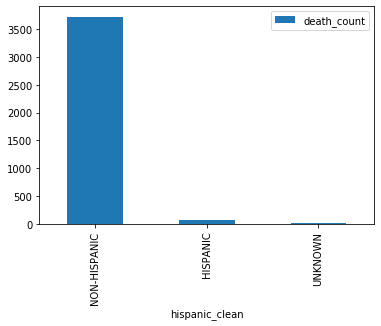

In [14]:
deaths_by_hispanic.plot.bar(x='hispanic_clean', y='death_count')

In [15]:
df.RACE.drop_duplicates()

0                African American
1                           White
6                 American Indian
12                White-multirace
68                        UNKNOWN
75                     Other Race
125                      Japanese
171               Black-multirace
188                       Chinese
371               Asian-multirace
470                   Other Asian
500     American Indian-multirace
632                        Korean
1069                      Unknown
2399                   Vietnamese
2802                 Asian Indian
Name: RACE, dtype: object

### How many people died by age group?

In [16]:
df.AGEYEARS

0       49
1       40
2       42
3       47
4       53
        ..
3802    36
3803    30
3804    64
3805    46
3806    51
Name: AGEYEARS, Length: 3807, dtype: int64

In [17]:
def get_age_group(age):
    if age < 20:
        return '0-19'
    elif age >=20 and age < 35:
        return '20-34'
    elif age >= 35 and age < 50:
        return '35-49'
    elif age >= 50 and age < 70:
        return '50-69'
    elif age >= 70:
        return '70 and over'
    return 'Unknown'    

In [18]:
df['age_group'] = df.AGEYEARS.apply(lambda x: get_age_group(x))
df[['age_group', 'AGEYEARS']]

,age_group,AGEYEARS
0,35-49,49
1,35-49,40
2,35-49,42
3,35-49,47
4,50-69,53
...,...,...
3802,35-49,36
3803,20-34,30
3804,50-69,64
3805,35-49,46


In [19]:
deaths_by_age_group = df[['STATEID', 'age_group']].groupby('age_group').count().reset_index().sort_values('age_group')
deaths_by_age_group.rename(columns={'STATEID': 'death_count'}, inplace=True)
deaths_by_age_group

,age_group,death_count
0,0-19,117
1,20-34,1206
2,35-49,1326
3,50-69,1091
4,70 and over,67


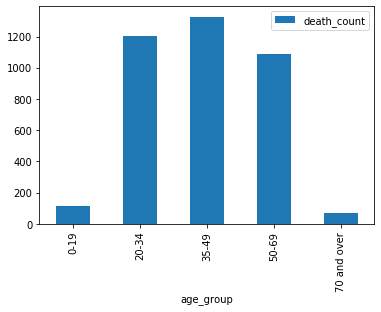

In [20]:
deaths_by_age_group.plot.bar(x='age_group', y='death_count')

In [21]:
df['DEATHDATE'] = pd.to_datetime(df['DEATHDATE'])
df['death_year'] = df['DEATHDATE'].apply(lambda x: x.year)
df['death_year']

0       2005
1       2005
2       2005
3       2005
4       2005
        ... 
3802    2017
3803    2017
3804    2017
3805    2017
3806    2017
Name: death_year, Length: 3807, dtype: int64

In [22]:
deaths_by_year = df[['STATEID', 'death_year']].groupby('death_year').count().reset_index().sort_values('death_year')
deaths_by_year.rename(columns={'STATEID': 'death_count'}, inplace=True)
deaths_by_year

,death_year,death_count
0,2005,168
1,2006,187
2,2007,192
3,2008,237
4,2009,277
5,2010,237
6,2011,301
7,2012,310
8,2013,325
9,2014,335


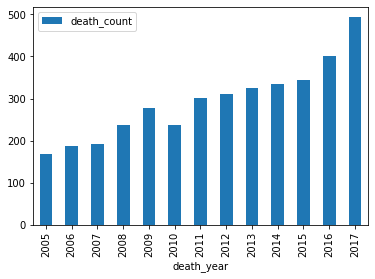

In [23]:
deaths_by_year.plot.bar(x='death_year', y='death_count')

In [24]:
# Group by death city
deaths_by_city = df[['STATEID', 'DEATHCITY']].groupby('DEATHCITY').count().reset_index().sort_values('STATEID', ascending=False)
deaths_by_city.rename(columns={'STATEID': 'death_count'}, inplace=True)
deaths_by_city

,DEATHCITY,death_count
241,MINNEAPOLIS,829
341,SAINT PAUL,285
98,DULUTH,138
337,SAINT CLOUD,93
325,ROCHESTER,89
...,...,...
249,MOOSE LAKE,1
251,MORRILL TOWNSHIP,1
253,MORRISTOWN,1
254,MORTON,1


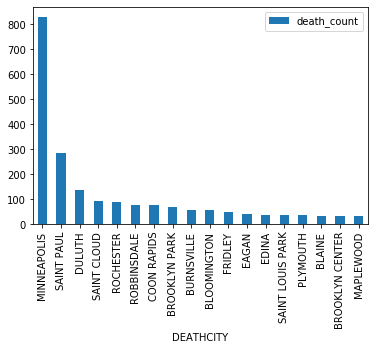

In [25]:
deaths_by_city[deaths_by_city['death_count'] > 30].plot.bar(x='DEATHCITY', y='death_count')

In [26]:
# Join with city population to calculate per capita
pop_estimates = pd.read_csv('mn_cities_townships_pop_estimates.csv', thousands=',')
pop_estimates

,FIPS10,County Name,City or Township Name,"Total Population, 2018","Population in Households, 2018","Population in Group Quarters, 2018","Households, 2018","Persons per Household, 2018"
0,2700100460,Aitkin,Aitkin city,"2,123","1,919",204,937,2.05
1,2700100478,Aitkin,Aitkin township,860,840,20,361,2.33
2,2700103358,Aitkin,Ball Bluff township,260,260,-,125,2.08
3,2700103412,Aitkin,Balsam township,39,39,-,21,1.86
4,2700104384,Aitkin,Beaver township,44,44,-,27,1.63
...,...,...,...,...,...,...,...,...
2742,2799961996,Multi-County City,Spring Lake Park city,"6,410","6,394",16,"2,698",2.37
2743,2799962446,Multi-County City,Staples city,"2,972","2,754",218,"1,256",2.19
2744,2799963778,Multi-County City,Swanville city,348,348,-,143,2.43
2745,2799967504,Multi-County City,Wadena city,"4,150","3,987",163,"1,891",2.11


In [27]:
pop_estimates.columns

Index(['FIPS10', ' County Name ', ' City or Township Name ',
       ' Total Population, 2018 ', ' Population in Households, 2018 ',
       ' Population in Group Quarters, 2018 ', ' Households, 2018 ',
       ' Persons per Household, 2018 '],
      dtype='object')

In [28]:
pop_estimates.rename(columns=lambda x: x.strip(), inplace=True)
city_pop_estimates = pop_estimates[pop_estimates['City or Township Name'].str.contains(' city')].copy()
city_pop_estimates

,FIPS10,County Name,City or Township Name,"Total Population, 2018","Population in Households, 2018","Population in Group Quarters, 2018","Households, 2018","Persons per Household, 2018"
0,2700100460,Aitkin,Aitkin city,"2,123","1,919",204,937,2.05
12,2700129096,Aitkin,Hill City city,622,611,11,271,2.25
21,2700138996,Aitkin,McGrath city,73,62,11,31,2.00
22,2700139014,Aitkin,McGregor city,381,381,-,179,2.13
29,2700149498,Aitkin,Palisade city,152,152,-,69,2.20
...,...,...,...,...,...,...,...,...
2742,2799961996,Multi-County City,Spring Lake Park city,"6,410","6,394",16,"2,698",2.37
2743,2799962446,Multi-County City,Staples city,"2,972","2,754",218,"1,256",2.19
2744,2799963778,Multi-County City,Swanville city,348,348,-,143,2.43
2745,2799967504,Multi-County City,Wadena city,"4,150","3,987",163,"1,891",2.11


In [34]:
city_pop_estimates['city_name'] = city_pop_estimates['City or Township Name'].str.replace(' city', '').str.upper()
city_pop_estimates['city_name'] = city_pop_estimates['city_name'].str.replace(r'(^| )ST.', ' SAINT').str.strip()
city_pop_estimates[city_pop_estimates['city_name'].str.contains('SAINT')]

,FIPS10,County Name,City or Township Name,"Total Population, 2018","Population in Households, 2018","Population in Group Quarters, 2018","Households, 2018","Persons per Household, 2018",city_name
66,2700356950,Anoka,St. Francis city (part),"7,868","7,868",-,"2,735",2.88,SAINT FRANCIS (PART)
176,2700956896,Benton,St. Cloud city (part),"6,367","6,265",102,"2,999",2.09,SAINT CLOUD (PART)
233,2701356824,Blue Earth,St. Clair city,832,832,-,294,2.83,SAINT CLAIR
417,2702562320,Chisago,Stacy city,"1,524","1,524",-,581,2.62,SAINTCY
515,2703363022,Cottonwood,Storden city,203,203,-,100,2.03,SAINTRDEN
595,2703761492,Dakota,South St. Paul city,"20,878","20,769",109,"8,408",2.47,SOUTH SAINT PAUL
600,2703769700,Dakota,West St. Paul city,"21,053","20,755",298,"9,047",2.29,WEST SAINT PAUL
846,2705356680,Hennepin,St. Anthony city (part),"5,387","5,356",31,"2,233",2.40,SAINT ANTHONY (PART)
847,2705356770,Hennepin,St. Bonifacius city,"2,328","2,328",-,871,2.67,SAINT BONIFACIUS
848,2705357220,Hennepin,St. Louis Park city,"48,910","48,234",676,"23,414",2.06,SAINT LOUIS PARK


In [35]:
deaths_by_city_merged = deaths_by_city.merge(
    city_pop_estimates,
    how="left",
    left_on="DEATHCITY",
    right_on="city_name"
)
deaths_by_city_merged

,DEATHCITY,death_count,FIPS10,County Name,City or Township Name,"Total Population, 2018","Population in Households, 2018","Population in Group Quarters, 2018","Households, 2018","Persons per Household, 2018",city_name
0,MINNEAPOLIS,829,2.705343e+09,Hennepin,Minneapolis city,"428,483","410,488","17,995","182,719",2.25,MINNEAPOLIS
1,SAINT PAUL,285,2.712358e+09,Ramsey,St. Paul city,"313,010","301,939","11,071","118,666",2.54,SAINT PAUL
2,DULUTH,138,2.713717e+09,St. Louis,Duluth city,"87,213","80,729","6,484","36,736",2.20,DULUTH
3,SAINT CLOUD,93,2.799957e+09,Multi-County City,St. Cloud city,"68,202","63,550","4,652","26,708",2.38,SAINT CLOUD
4,ROCHESTER,89,2.710955e+09,Olmsted,Rochester city,"117,444","115,293","2,151","48,044",2.40,ROCHESTER
...,...,...,...,...,...,...,...,...,...,...,...
412,MOOSE LAKE,1,2.701744e+09,Carlton,Moose Lake city,"2,794","1,292","1,502",652,1.98,MOOSE LAKE
413,MORRILL TOWNSHIP,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414,MORRISTOWN,1,2.713144e+09,Rice,Morristown city,995,974,21,400,2.44,MORRISTOWN
415,MORTON,1,2.712944e+09,Renville,Morton city,371,371,-,179,2.07,MORTON


In [44]:
deaths_by_city_merged_30plus = deaths_by_city_merged[deaths_by_city_merged['death_count'] > 30].copy()
deaths_by_city_merged_30plus

,DEATHCITY,death_count,FIPS10,County Name,City or Township Name,"Total Population, 2018","Population in Households, 2018","Population in Group Quarters, 2018","Households, 2018","Persons per Household, 2018",city_name
0,MINNEAPOLIS,829,2.705343e+09,Hennepin,Minneapolis city,"428,483","410,488","17,995","182,719",2.25,MINNEAPOLIS
1,SAINT PAUL,285,2.712358e+09,Ramsey,St. Paul city,"313,010","301,939","11,071","118,666",2.54,SAINT PAUL
2,DULUTH,138,2.713717e+09,St. Louis,Duluth city,"87,213","80,729","6,484","36,736",2.20,DULUTH
3,SAINT CLOUD,93,2.799957e+09,Multi-County City,St. Cloud city,"68,202","63,550","4,652","26,708",2.38,SAINT CLOUD
4,ROCHESTER,89,2.710955e+09,Olmsted,Rochester city,"117,444","115,293","2,151","48,044",2.40,ROCHESTER
5,ROBBINSDALE,77,2.705355e+09,Hennepin,Robbinsdale city,"14,776","14,522",254,"6,280",2.31,ROBBINSDALE
6,COON RAPIDS,76,2.700313e+09,Anoka,Coon Rapids city,"63,899","63,497",402,"24,348",2.61,COON RAPIDS
7,BROOKLYN PARK,68,2.705308e+09,Hennepin,Brooklyn Park city,"81,679","81,282",397,"27,957",2.91,BROOKLYN PARK
8,BURNSVILLE,58,2.703709e+09,Dakota,Burnsville city,"62,657","62,244",413,"25,339",2.46,BURNSVILLE
9,BLOOMINGTON,55,2.705307e+09,Hennepin,Bloomington city,"89,654","88,190","1,464","38,246",2.31,BLOOMINGTON


In [45]:
deaths_by_city_merged_30plus['population_2018'] = deaths_by_city_merged_30plus['Total Population, 2018'].str.strip().str.replace(',', '').astype(int)

In [48]:
deaths_by_city_merged_30plus['deaths_per_capita'] = deaths_by_city_merged_30plus['death_count'] / deaths_by_city_merged_30plus['population_2018']
deaths_by_city_merged_30plus

,DEATHCITY,death_count,FIPS10,County Name,City or Township Name,"Total Population, 2018","Population in Households, 2018","Population in Group Quarters, 2018","Households, 2018","Persons per Household, 2018",city_name,population_2018,deaths_per_capita
0,MINNEAPOLIS,829,2.705343e+09,Hennepin,Minneapolis city,"428,483","410,488","17,995","182,719",2.25,MINNEAPOLIS,428483,0.001935
1,SAINT PAUL,285,2.712358e+09,Ramsey,St. Paul city,"313,010","301,939","11,071","118,666",2.54,SAINT PAUL,313010,0.000911
2,DULUTH,138,2.713717e+09,St. Louis,Duluth city,"87,213","80,729","6,484","36,736",2.20,DULUTH,87213,0.001582
3,SAINT CLOUD,93,2.799957e+09,Multi-County City,St. Cloud city,"68,202","63,550","4,652","26,708",2.38,SAINT CLOUD,68202,0.001364
4,ROCHESTER,89,2.710955e+09,Olmsted,Rochester city,"117,444","115,293","2,151","48,044",2.40,ROCHESTER,117444,0.000758
5,ROBBINSDALE,77,2.705355e+09,Hennepin,Robbinsdale city,"14,776","14,522",254,"6,280",2.31,ROBBINSDALE,14776,0.005211
6,COON RAPIDS,76,2.700313e+09,Anoka,Coon Rapids city,"63,899","63,497",402,"24,348",2.61,COON RAPIDS,63899,0.001189
7,BROOKLYN PARK,68,2.705308e+09,Hennepin,Brooklyn Park city,"81,679","81,282",397,"27,957",2.91,BROOKLYN PARK,81679,0.000833
8,BURNSVILLE,58,2.703709e+09,Dakota,Burnsville city,"62,657","62,244",413,"25,339",2.46,BURNSVILLE,62657,0.000926
9,BLOOMINGTON,55,2.705307e+09,Hennepin,Bloomington city,"89,654","88,190","1,464","38,246",2.31,BLOOMINGTON,89654,0.000613


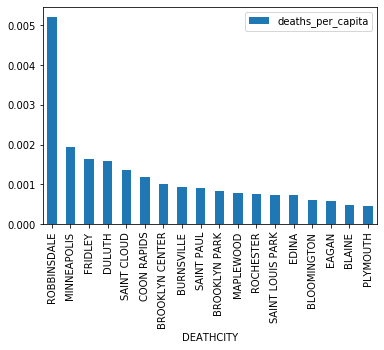

In [51]:
deaths_by_city_merged_30plus.sort_values('deaths_per_capita', ascending=False).plot.bar(x='DEATHCITY', y='deaths_per_capita')





In [ ]:
# TODO:
# Strip leading/trailing whitespace

In [ ]:
# #YOUR TURN
# Insert a code chunk and write your own quer that creates a column that has 3 groups: Under 18; 65 and over; Everybody else


# #YOUR TURN
# Show how many deaths there were in each group?


# #Make that into a new dataframe
# And add clean_names()
# ```{r}
# age_by_yr <-  pivot_wider(agegroup_by_year, names_from=agegroup, values_from = count) %>% clean_names()
# ```

# #Add total and pct columns
# ```{r}
# #Notice that you can use mutate to create more than one new column at the same time
# #and even use the first new column in your calculation for the second one!

# age_by_yr <-  age_by_yr %>%
#   mutate(total = x0_19 + x20_34 + x35_49 + x50_69 + x70_and_over,
#          pctUnder20 = (x0_19 / total)*100)



# ```

# #YOUR TURN
# Display the year and pctUnder20; arrange by year
# ```{r}
# #Notice that in the query above when I created the pctUnder20 variable, I made the U uppercase. 
# #So now I need to refer to it exactly that way when using it in subsequent queries


# ```


# #Pivot Longer
# ```{r}
# #we'll flip the agegroup2 data frame back to what it originally looked like
# #first argument is the column you want to retain on the far left
# #then you give it names for the new columns
# age_by_yr %>%  pivot_longer(-deathyr,  names_to = "myvariables", values_to = "myvalues" )
# ```

# #Tell it to leave out a column (or more)
# ```{r}

# #In the select portion, putting a minus sign in front of a column name will exclude it from the results
# #but it will keep any variables that you don't mention

# age_by_yr  %>% 
#   select(-pctUnder20, -total)%>%
#   pivot_longer(-deathyr,  names_to = "myvariables", values_to = "myvalues" )
# ```


# #Regular expressions

# Find all the deaths involving Methadone
# ```{r}
# #grepl looks for the value anywhere in the column you specify
# #https://www.rdocumentation.org/packages/base/versions/3.6.1/topics/grep

# #Notice that I've put METHADONE in all capital letters because that is how it is stored in the data

# deaths %>%
#   filter(grepl("METHADONE", causea)) %>%
#   group_by(causea) %>%
#   summarise(count=n()) %>% 
#   arrange(desc(count))
# ```

# #Make a new column

# ```{r}
# #Now that we've found all those deaths involving methadone, let's make a new field
# #that says "yes" for those that have the word methadone in the causea columns
# #and put in "no" for all other records

# deaths <-  deaths %>%
#   mutate(methadone = case_when(grepl("METHADONE", causea)~'yes',
#                                                    TRUE~'no'))
# ```